In [11]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [12]:
def plot_from_string(data_string, title, fit_complexity=None):
    lines = data_string.strip().split('\n')
    steps = [int(line.split()[0]) for line in lines]
    times = [float(line.split()[1]) for line in lines]

    # ajuste de curva
    fitted_y_values = None
    fit_label = None
    label_template= ""

    if fit_complexity:
        N_data = np.array(steps)
        y_data = np.array(times)

        if fit_complexity == 'log_n':
            func_to_fit = lambda N, C: C * np.log(N)
            label_template = "Ajuste O(log N)"
        elif fit_complexity == 'n_log_n':
            func_to_fit = lambda N, C: C * N * np.log(N)
            label_template = "Ajuste O(N log N)"
        elif fit_complexity == 'n_3':
            func_to_fit = lambda N, C: C * N * N * N
            label_template = "Ajuste O(N^3)"
        elif fit_complexity == 'n_2':
            func_to_fit = lambda N, C: C * N * N
            label_template = "Ajuste O(N^2)"
        elif fit_complexity == 'n':
            func_to_fit = lambda N, C: C * N
            label_template = "Ajuste O(N)"
        else:
            print(f"Complejidad '{fit_complexity}' no reconocida.")
            plot_execution_times(steps, times, title)
            return
        try:
            popt, _ = curve_fit(func_to_fit, N_data, y_data)
            C_optimo = popt[0]
            print(f"Constante 'C' óptima encontrada: {C_optimo:e}")


            fitted_y_values = func_to_fit(N_data, C_optimo)
            fit_label = f"{label_template} (C={C_optimo:.2e})"
        except RuntimeError as e:
            print(f"No se pudo realizar el ajuste de curva: {e}")

    # Llama a la función de ploteo, pasándole los datos del ajuste si existen
    plot_execution_times(steps, times, title, fit_y=fitted_y_values, fit_label=fit_label)


def plot_execution_times(steps, times, title, fit_y=None, fit_label=None):
    plt.figure(figsize=(10, 6))

    # Grafica los datos empíricos (puntos azules)
    plt.plot(steps, times, 'bo:', markersize=8, zorder=5, label='Datos Empíricos')

    # Si se pasaron datos de la curva ajustada, la grafica (línea roja)
    if fit_y is not None and fit_label is not None:
        plt.plot(steps, fit_y, 'r--', zorder=6, label=fit_label)
        plt.legend()

    plt.title(title, fontsize=16)
    plt.xlabel('Tamaño de la entrada (N)', fontsize=12)
    plt.ylabel('Tiempo (Segundos)', fontsize=12)

    for x, y in zip(steps, times):
        if y < 0.01:
            label = f"{y:.1e}"
        else:
            label = f"{y:.4f}"
        plt.annotate(label, (x, y),
                     textcoords="offset points", xytext=(0, 10), ha='center',
                     bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", lw=0, alpha=0.7))

    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.ylim(bottom=0, top=max(times) * 1.15)
    plt.ticklabel_format(style='plain', axis='x')
    plt.xticks(steps, rotation=45)
    plt.tight_layout()
    plt.show()

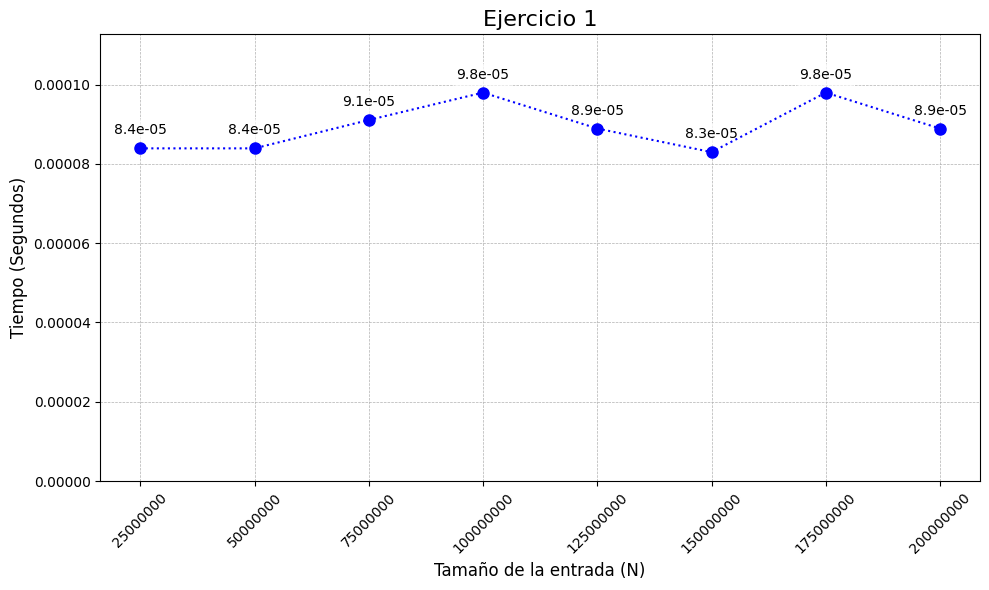

In [13]:

datos_ej_1 = """
25000000 8.392333984375e-05
50000000 8.392333984375e-05
75000000 9.107589721679688e-05
100000000 9.799003601074219e-05
125000000 8.893013000488281e-05
150000000 8.296966552734375e-05
175000000 9.799003601074219e-05
200000000 8.893013000488281e-05
"""

plot_from_string(datos_ej_1, "Ejercicio 1")

Constante 'C' óptima encontrada: 4.871373e-06


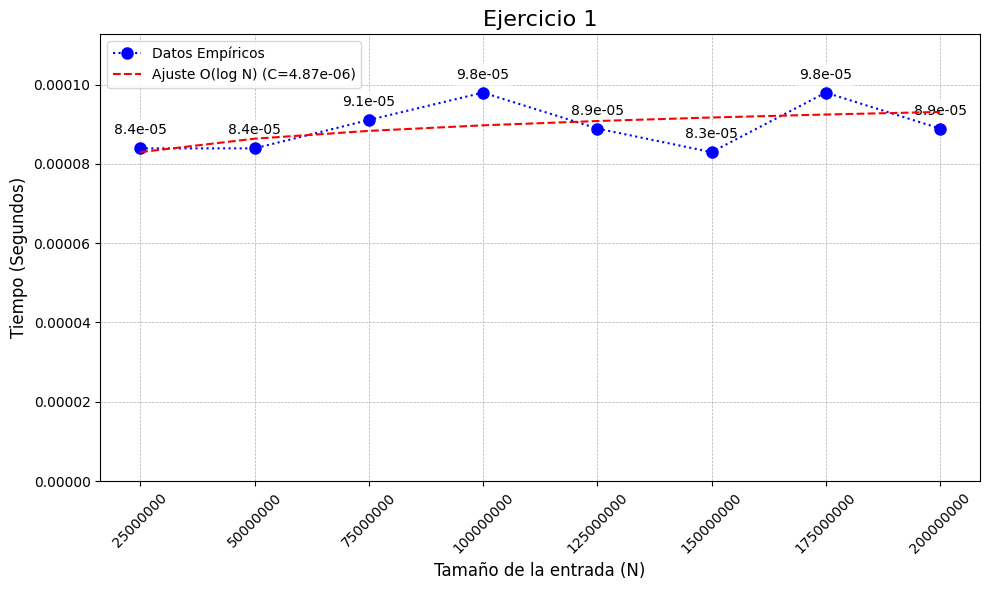

In [14]:
plot_from_string(datos_ej_1, "Ejercicio 1", "log_n")

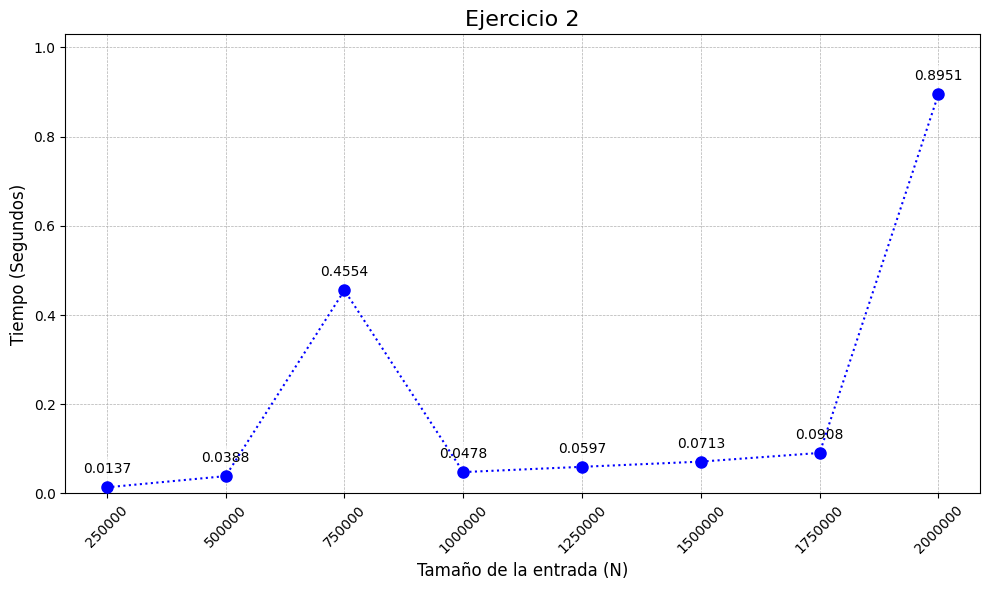

In [15]:
datos_ej_2 = """
250000 0.013655424118041992
500000 0.03882098197937012
750000 0.45538604259490967
1000000 0.0478440523147583
1250000 0.059668540954589844
1500000 0.07131445407867432
1750000 0.09078192710876465
2000000 0.8951303958892822
"""

plot_from_string(datos_ej_2, "Ejercicio 2")

Constante 'C' óptima encontrada: 1.291904e-13


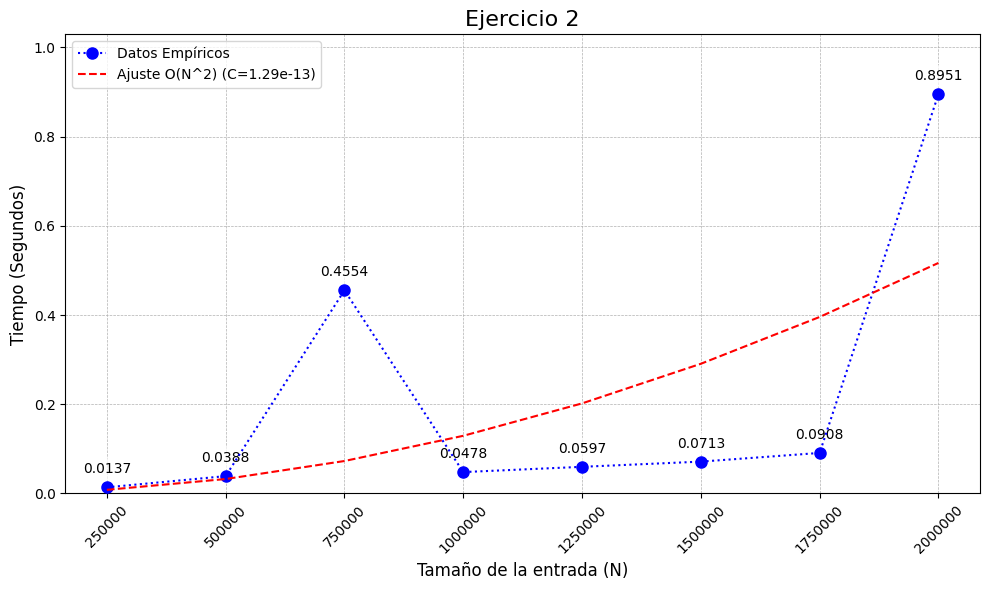

In [16]:
plot_from_string(datos_ej_2, "Ejercicio 2", "n_2")

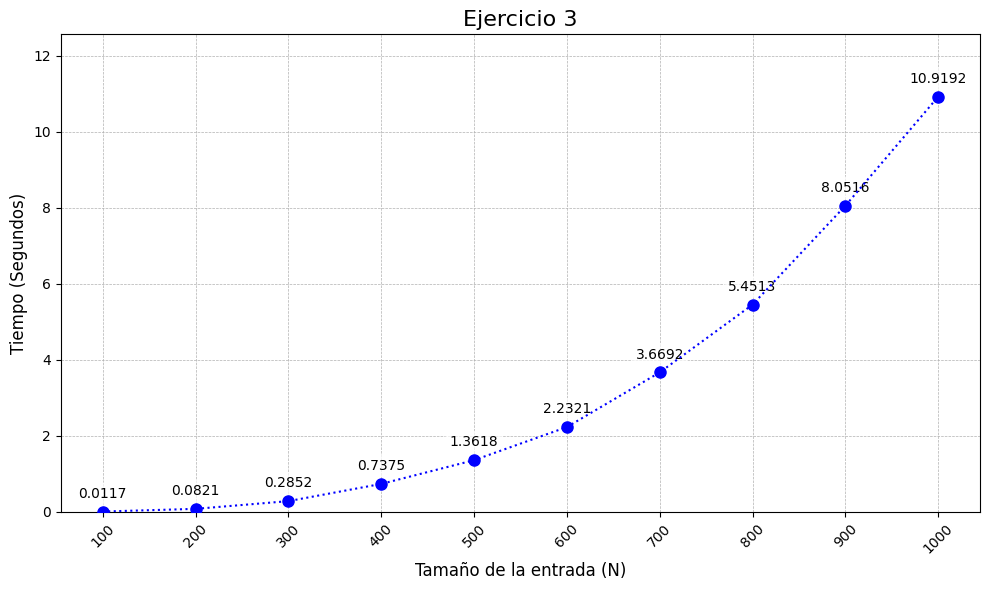

In [17]:
datos_ej_3 = """
100 0.011661052703857422
200 0.0821371078491211
300 0.285214900970459
400 0.7375490665435791
500 1.361759901046753
600 2.2320780754089355
700 3.669235944747925
800 5.451270341873169
900 8.051589012145996
1000 10.91919994354248
"""

plot_from_string(datos_ej_3, "Ejercicio 3")

Constante 'C' óptima encontrada: 1.089076e-08


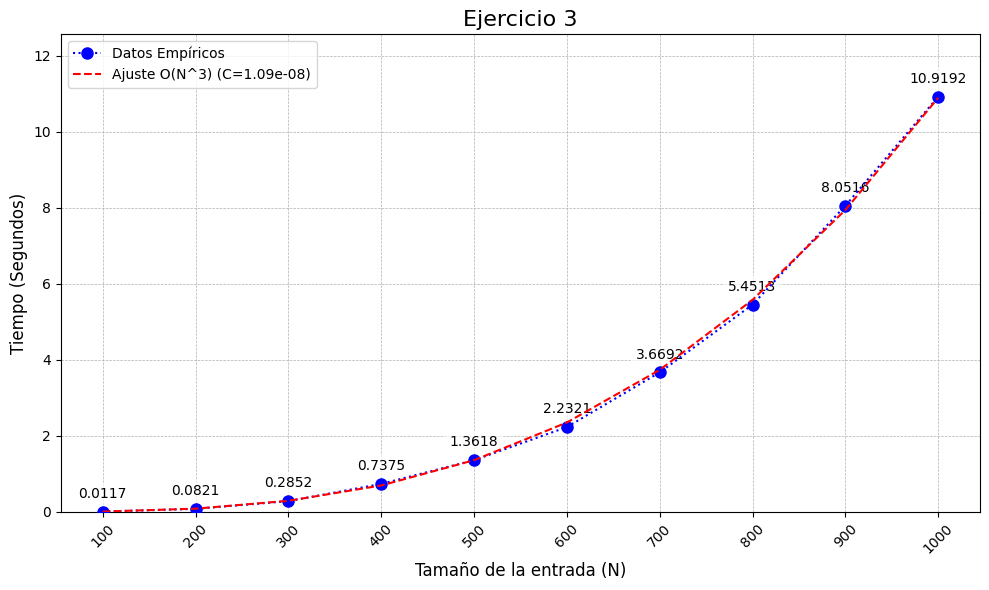

In [18]:
plot_from_string(datos_ej_3, "Ejercicio 3", "n_3")

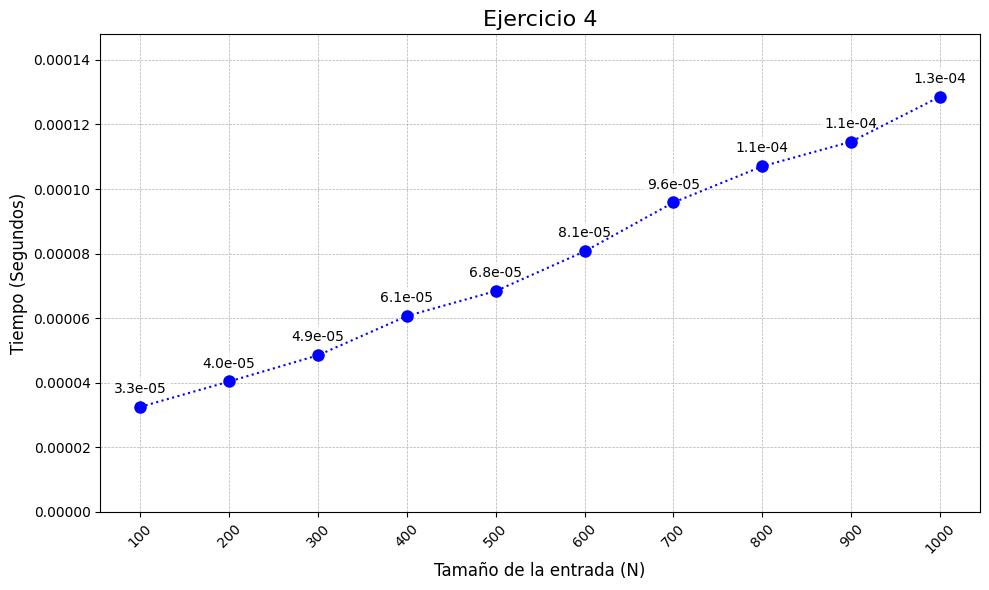

In [19]:
datos_ej_4 = """
100 3.254413604736328e-05
200 4.0411949157714844e-05
300 4.851818084716797e-05
400 6.0677528381347656e-05
500 6.842613220214844e-05
600 8.07046890258789e-05
700 9.584426879882812e-05
800 0.00010704994201660156
900 0.00011467933654785156
1000 0.00012862682342529297
"""

plot_from_string(datos_ej_4, "Ejercicio 4")

Constante 'C' óptima encontrada: 1.343814e-07


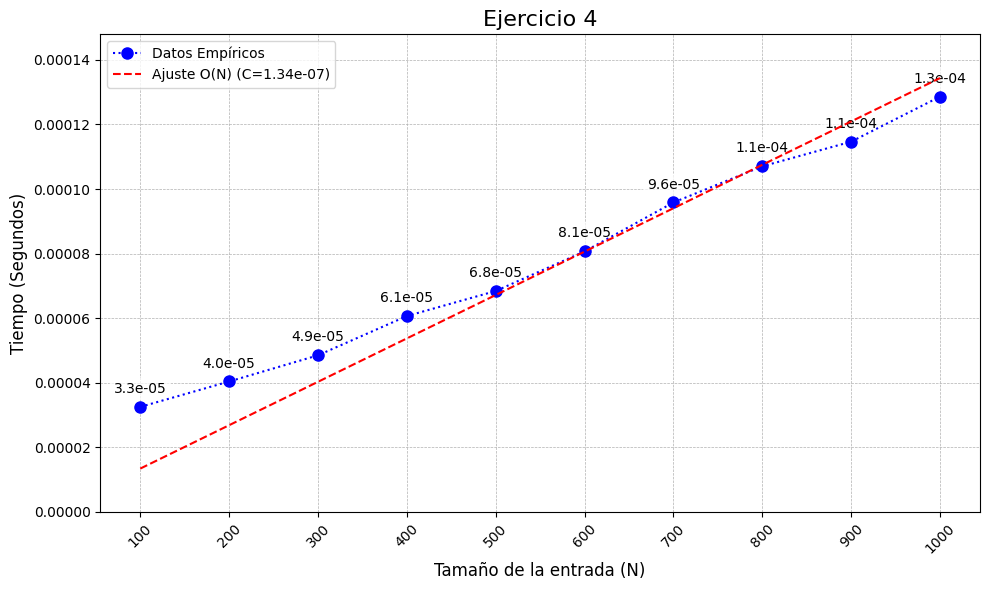

In [20]:
plot_from_string(datos_ej_4, "Ejercicio 4", "n")